# Analytic Report on Food Price and Sales in 14 States in Nigeria

#### Data Source 
The dataset was downloaded from data.humdata.org[https://data.humdata.org/dataset/42db041f-7aaf-4ab4-961f-2a12096861e7/resource/12b51155-0cd3-4806-9924-61ede4077591/download/wfp_food_prices_nga.csv]

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/wfp_food_prices_nga.csv')
df.shape

(74422, 14)

In [3]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

date :
 ['#date' '2002-01-15' '2002-02-15' '2002-03-15' '2002-04-15' '2002-05-15'
 '2002-06-15' '2002-07-15' '2002-08-15' '2002-09-15' '2002-10-15'
 '2002-11-15' '2002-12-15' '2003-01-15' '2003-02-15' '2003-03-15'
 '2003-04-15' '2003-05-15' '2003-06-15' '2003-07-15' '2003-08-15'
 '2003-09-15' '2003-10-15' '2003-11-15' '2003-12-15' '2004-01-15'
 '2004-02-15' '2004-03-15' '2004-04-15' '2004-05-15' '2004-06-15'
 '2004-07-15' '2004-08-15' '2004-09-15' '2004-10-15' '2004-11-15'
 '2004-12-15' '2005-01-15' '2005-02-15' '2005-03-15' '2005-04-15'
 '2005-05-15' '2005-06-15' '2005-07-15' '2005-08-15' '2005-09-15'
 '2005-10-15' '2005-11-15' '2005-12-15' '2006-01-15' '2006-02-15'
 '2006-03-15' '2006-04-15' '2006-05-15' '2006-06-15' '2006-07-15'
 '2006-08-15' '2006-09-15' '2006-10-15' '2006-11-15' '2006-12-15'
 '2007-01-15' '2007-02-15' '2007-03-15' '2007-04-15' '2007-05-15'
 '2007-06-15' '2007-07-15' '2007-08-15' '2007-09-15' '2007-10-15'
 '2007-11-15' '2007-12-15' '2008-01-15' '2008-02-15' '2008-0

0.0        8886
0.0        2858
50.0       1961
200.0      1461
100.0      1337
           ... 
21675.0       1
149.89        1
25950.0       1
351.03        1
502.73        1
Name: price, Length: 19447, dtype: int64

 **************************************** 

usdprice :
 ['#value+usd' '1.5525' '1.3254' ... '1.0151' '0.0' 0.0]
0.0           8886
0.0           2858
0.1629         205
0.1397         150
0.1401         142
              ... 
0.206            1
90.9091          1
0.9341           1
1.9231           1
#value+usd       1
Name: usdprice, Length: 28636, dtype: int64

 **************************************** 



In [4]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733


### Data cleaning

###### Check For Missing Value

In [5]:
#There is No Missing Value
df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

###### Removing The First Row and Reset the index

In [6]:
#Drop the first Row
df = df.iloc[1:]

In [7]:
# Reset the index
df = df.reset_index(drop=True)

In [8]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374


In [9]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

###### Rename Admin1 and 2 to State and Local Government

In [10]:
df.rename(columns={'admin1': "state"}, inplace=True)
df.rename(columns={'admin2': "lga"}, inplace=True)

In [11]:
df.columns

Index(['date', 'state', 'lga', 'market', 'latitude', 'longitude', 'category',
       'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price',
       'usdprice'],
      dtype='object')

In [12]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74421 entries, 0 to 74420
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       74421 non-null  object
 1   state      74421 non-null  object
 2   lga        74421 non-null  object
 3   market     74421 non-null  object
 4   latitude   74421 non-null  object
 5   longitude  74421 non-null  object
 6   category   74421 non-null  object
 7   commodity  74421 non-null  object
 8   unit       74421 non-null  object
 9   priceflag  74421 non-null  object
 10  pricetype  74421 non-null  object
 11  currency   74421 non-null  object
 12  price      74421 non-null  object
 13  usdprice   74421 non-null  object
dtypes: object(14)
memory usage: 7.9+ MB


###### Convert date to datetime

In [14]:
df["date"] = pd.to_datetime(df['date'])

df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['year'] = df['date'].dt.year

In [15]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,day,year
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525,1,15,2002
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254,1,15,2002
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656,1,15,2002
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733,1,15,2002
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374,1,15,2002


In [16]:
df['month'] = df['month'].replace({ 1: 'January', 2 : 'February' , 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 :'July', 8 : 'August', 9: 'September', 10 : 'October', 11 : 'November', 12 : 'December'})

In [17]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,day,year
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525,January,15,2002
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254,January,15,2002
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656,January,15,2002
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733,January,15,2002
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374,January,15,2002


#### Export the Clean Data

In [19]:
# Export current tmp dataframe
df.to_csv("data/df_clean.csv" , index=False)

#### import the Clean Data

In [22]:
df_clean = pd.read_csv("data/df_clean.csv")

In [23]:
df_clen.head()

NameError: name 'df_clen' is not defined

In [159]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [160]:
df['month'].value_counts()

February     6777
May          6627
March        6551
January      6393
October      6350
April        6294
December     6283
November     6220
June         6078
September    5924
July         5487
August       5437
Name: month, dtype: int64

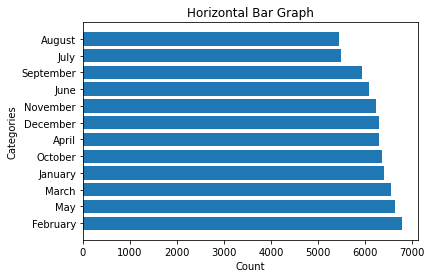

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['month']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()

# Define colors for the bars
colors = ['red', 'green', 'blue', 'orange']
# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()


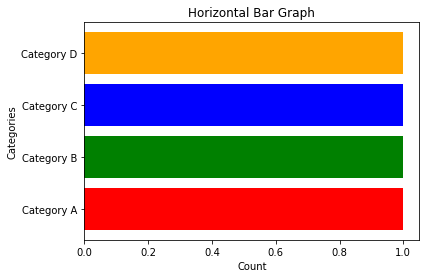

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = ['Category A', 'Category B', 'Category C', 'Category D']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()

# Define colors for the bars
colors = ['red', 'green', 'blue', 'orange']

# Create the horizontal bar plot with colors
plt.barh(category_counts.index, category_counts.values, color=colors)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()


<AxesSubplot:xlabel='month', ylabel='count'>

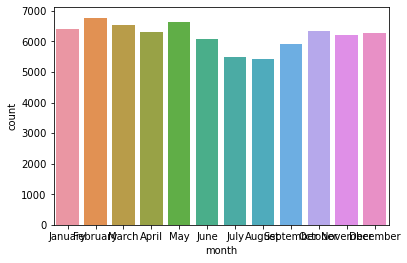

In [168]:
sns.countplot(x="month", data=df)

<AxesSubplot:ylabel='month'>

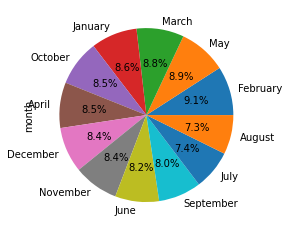

In [172]:
df['month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [121]:
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [122]:
df['year'].value_counts()

2021    13414
2022    12565
2020     9655
2019     9054
2018     7990
2017     7355
2016     4296
2023     3222
2015     3064
2014     1464
2013      401
2012      320
2010      267
2011      264
2008      214
2009      191
2005      186
2003      171
2002      120
2006       99
2007       74
2004       34
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

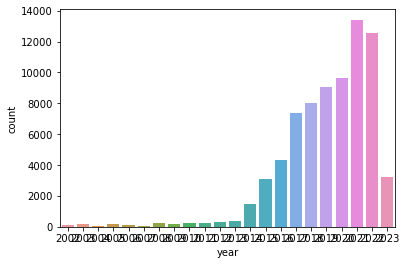

In [123]:
sns.countplot(x="year", data=df)

<AxesSubplot:ylabel='year'>

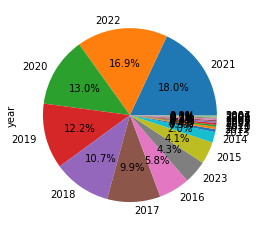

In [124]:
df['year'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [95]:
df['state'].unique()

array(['Katsina', 'Sokoto', 'Borno', 'Kano', 'Jigawa', 'Oyo', 'Lagos',
       'Kaduna', 'Zamfara', 'Abia', 'Gombe', 'Kebbi', 'Adamawa', 'Yobe'],
      dtype=object)

In [96]:
df['state'].value_counts()

Yobe       22753
Borno      19388
Kaduna      4847
Katsina     3638
Kano        2956
Oyo         2837
Jigawa      2734
Zamfara     2716
Kebbi       2702
Gombe       2699
Lagos       2556
Adamawa     2359
Abia        1602
Sokoto       633
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

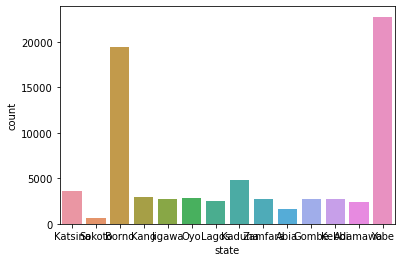

In [97]:
sns.countplot(x="state", data=df)

<AxesSubplot:ylabel='state'>

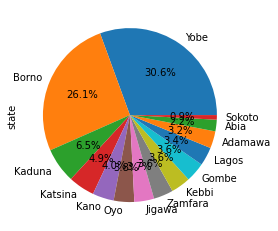

In [98]:
df['state'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [99]:
df['market'].unique()

array(['Jibia (CBM)', 'Illela (CBM)', 'Mai Adoua (CBM)',
       'Damassack (CBM)', 'Dawanau', 'Mai Gatari (CBM)', 'Ibadan',
       'Maiduguri', 'Lagos', 'Giwa', 'Kaura Namoda', 'Aba', 'Gombe',
       'Gujungu', 'Saminaka', 'Dandume', 'Gwandu', 'Mubi', 'Biu',
       'Damaturu', 'Potiskum', 'Abba Gamaram', 'Baga Road', 'Bullunkutu',
       'Budum', 'Custom', 'Kusawam Shanu', 'Monday', 'Tashan Bama',
       'Bolori Stores', 'Damaturu (Sunday Market)', 'Geidam',
       'Gujba (Buni Yadi)', 'Jakusko', 'Bade (Gashua)', 'Nguru',
       'Yunusari', 'Yusufari', 'Bursari', 'Gulani (Tettaba)'],
      dtype=object)

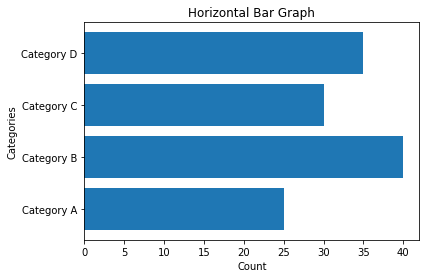

In [162]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [25, 40, 30, 35]

# Create the horizontal bar plot
plt.barh(categories, values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()


In [100]:
df['market'].value_counts()

Potiskum                    3888
Dawanau                     2956
Ibadan                      2837
Maiduguri                   2766
Kaura Namoda                2716
Gwandu                      2702
Gombe                       2699
Lagos                       2556
Damaturu                    2548
Dandume                     2529
Giwa                        2499
Biu                         2452
Gujungu                     2385
Mubi                        2359
Saminaka                    2348
Baga Road                   1825
Budum                       1812
Abba Gamaram                1810
Monday                      1806
Tashan Bama                 1799
Custom                      1797
Geidam                      1689
Nguru                       1684
Bade (Gashua)               1683
Damaturu (Sunday Market)    1678
Bursari                     1654
Yunusari                    1648
Jakusko                     1629
Yusufari                    1621
Aba                         1602
Gujba (Bun

<AxesSubplot:xlabel='market', ylabel='count'>

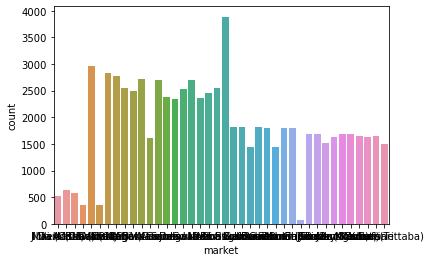

In [37]:
sns.countplot(x="market", data=df)

<AxesSubplot:ylabel='market'>

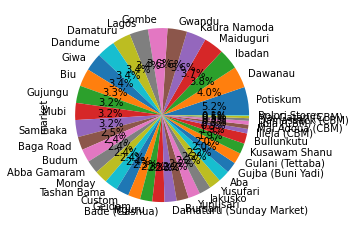

In [38]:
df['market'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [39]:
df['category'].unique()

array(['cereals and tubers', 'pulses and nuts', 'non-food',
       'oil and fats', 'meat, fish and eggs', 'milk and dairy',
       'vegetables and fruits', 'miscellaneous food'], dtype=object)

In [40]:
df['category'].value_counts()

cereals and tubers       37761
pulses and nuts          12661
vegetables and fruits     7437
meat, fish and eggs       5259
oil and fats              4381
non-food                  3295
miscellaneous food        2304
milk and dairy            1322
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

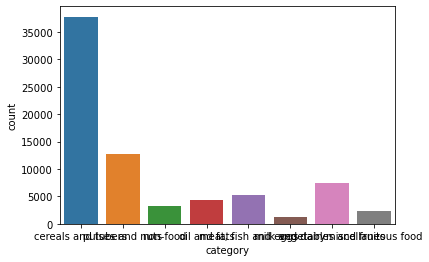

In [41]:
sns.countplot(x='category', data=df)

<AxesSubplot:ylabel='category'>

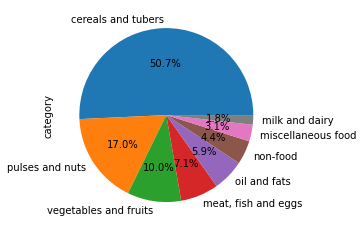

In [42]:
df['category'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [43]:
df['commodity'].unique()

array(['Millet', 'Rice (imported)', 'Sorghum', 'Beans (niebe)', 'Maize',
       'Wheat', 'Maize (white)', 'Sorghum (white)',
       'Rice (milled, local)', 'Bread', 'Cassava meal (gari, yellow)',
       'Gari (white)', 'Maize (yellow)', 'Rice (local)',
       'Sorghum (brown)', 'Yam (Abuja)', 'Fuel (diesel)',
       'Fuel (petrol-gasoline)', 'Oil (palm)', 'Cowpeas (brown)',
       'Cowpeas (white)', 'Yam', 'Groundnuts (shelled)', 'Maize flour',
       'Meat (beef)', 'Meat (goat)', 'Milk', 'Oil (vegetable)',
       'Beans (red)', 'Beans (white)', 'Groundnuts', 'Onions', 'Fish',
       'Eggs', 'Bananas', 'Oranges', 'Spinach', 'Watermelons', 'Cowpeas',
       'Tomatoes', 'Salt', 'Sugar'], dtype=object)

In [44]:
df['commodity'].value_counts()

Millet                         4631
Rice (imported)                4307
Rice (local)                   3863
Yam                            3694
Oil (palm)                     3052
Maize (white)                  2856
Sorghum (white)                2786
Cowpeas (white)                2608
Groundnuts (shelled)           2565
Sorghum (brown)                2556
Gari (white)                   2500
Maize (yellow)                 2465
Cowpeas (brown)                2425
Cassava meal (gari, yellow)    2223
Sorghum                        1882
Fuel (petrol-gasoline)         1652
Fuel (diesel)                  1643
Bread                          1561
Beans (white)                  1339
Groundnuts                     1333
Oil (vegetable)                1329
Meat (beef)                    1328
Meat (goat)                    1325
Milk                           1322
Beans (red)                    1320
Maize flour                    1320
Onions                         1313
Fish                        

<AxesSubplot:xlabel='commodity', ylabel='count'>

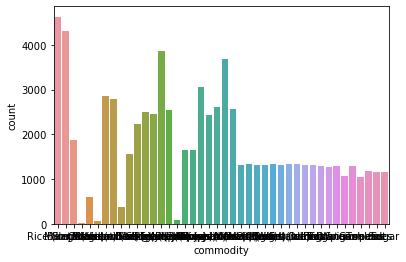

In [45]:
sns.countplot(x="commodity", data=df)

<AxesSubplot:ylabel='commodity'>

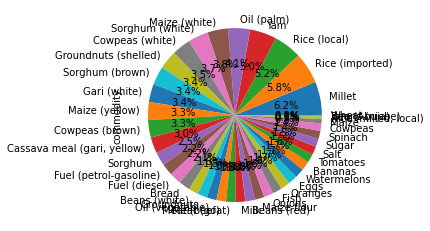

In [46]:
df['commodity'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [47]:
df['unit'].unique()

array(['KG', '100 KG', '50 KG', 'Unit', 'L', '100 L', '1.3 KG', '1.4 KG',
       '3.4 KG', '20 G', '750 ML', '1.1 KG', '0.5 KG', '1.5 KG', '30 pcs',
       '400 G', '300 G', '2.1 KG', '3.1 KG', '1.2 KG', '250 G',
       '100 Tubers'], dtype=object)

In [48]:
df['unit'].value_counts()

100 KG        18389
KG            17806
1.3 KG         5999
L              4907
1.4 KG         4376
1.2 KG         3647
750 ML         2664
400 G          2018
50 KG          1892
0.5 KG         1774
Unit           1561
20 G           1322
30 pcs         1293
2.1 KG         1292
250 G          1152
300 G          1073
3.1 KG          728
100 Tubers      650
1.1 KG          600
3.4 KG          594
1.5 KG          590
100 L            93
Name: unit, dtype: int64

<AxesSubplot:xlabel='unit', ylabel='count'>

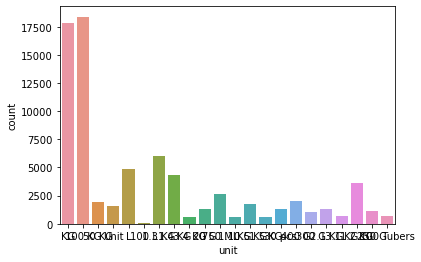

In [49]:
sns.countplot(x="unit", data=df)

<AxesSubplot:ylabel='unit'>

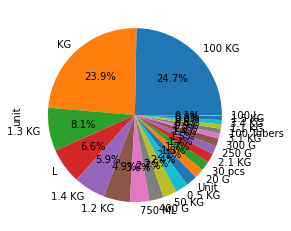

In [50]:
df['unit'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [51]:
df['priceflag'].unique()

array(['actual', 'actual,aggregate', 'aggregate', 'forecast'],
      dtype=object)

In [52]:
df['priceflag'].value_counts()

actual              48106
aggregate           14116
forecast            11744
actual,aggregate      454
Name: priceflag, dtype: int64

<AxesSubplot:xlabel='priceflag', ylabel='count'>

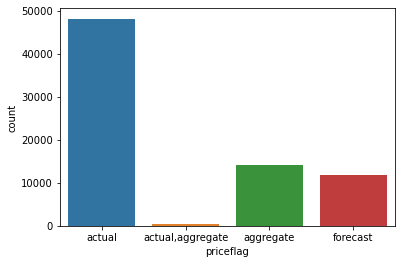

In [53]:
sns.countplot(x="priceflag", data=df)

<AxesSubplot:ylabel='priceflag'>

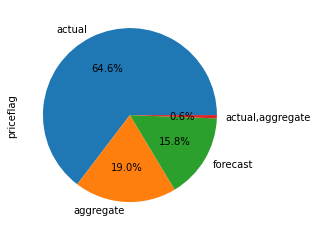

In [54]:
df['priceflag'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [55]:
df['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [56]:
df['pricetype'].value_counts()

Retail       50472
Wholesale    23948
Name: pricetype, dtype: int64

<AxesSubplot:xlabel='pricetype', ylabel='count'>

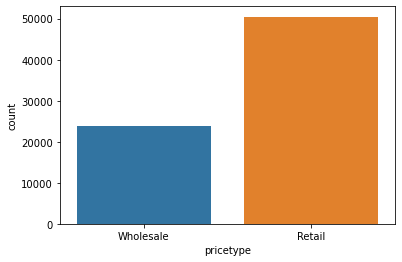

In [57]:
sns.countplot(x="pricetype", data=df)

<AxesSubplot:ylabel='pricetype'>

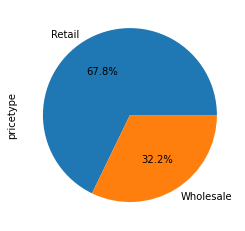

In [58]:
df['pricetype'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [59]:
df['currency'].unique()

array(['NGN'], dtype=object)

In [60]:
df['currency'].value_counts()

NGN    74420
Name: currency, dtype: int64

<AxesSubplot:xlabel='currency', ylabel='count'>

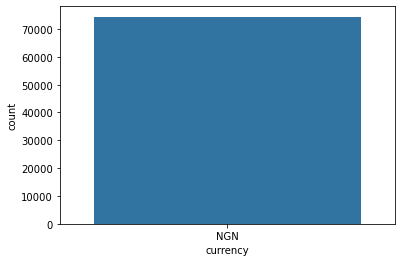

In [61]:
sns.countplot(x="currency", data=df)

<AxesSubplot:ylabel='currency'>

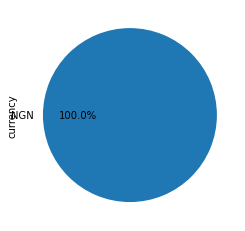

In [62]:
df['currency'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [63]:
df['price'].unique()

array(['150.18', '358.7', '155.61', ..., '467.66', '0.0', 0.0],
      dtype=object)

In [64]:
df['price'].value_counts()

0.0        8886
0.0        2858
50.0       1961
200.0      1461
100.0      1337
           ... 
25950.0       1
351.03        1
114.83        1
181.73        1
59250.0       1
Name: price, Length: 19446, dtype: int64

In [65]:
df['usdprice'].value_counts()

0.0        8886
0.0        2858
0.1629      205
0.1397      150
0.1401      142
           ... 
21.4372       1
17.9393       1
0.6537        1
18.2715       1
2.3227        1
Name: usdprice, Length: 28635, dtype: int64

In [125]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Latitude and Longitude coordinates
latitudes = [40.7128, 51.5074, 35.6895]  # Example latitude values (New York, London, Tokyo)
longitudes = [-74.0060, -0.1278, 139.6917]  # Example longitude values (New York, London, Tokyo)

# Create a Basemap instance
map = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Convert lat/lon coordinates to map projection
x, y = map(longitudes, latitudes)

# Plot the points on the map
map.scatter(x, y, marker='o', color='red')

# Show the map
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [127]:
pip install Cartopy

  Installing build dependencies: started
  Installing build dependencies: still running...Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\USER\anaconda3\python.exe' 'C:\Users\USER\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\USER\AppData\Local\Temp\tmphbdvxwjx'
       cwd: C:\Users\USER\AppData\Local\Temp\pip-install-7i3dbuiz\cartopy_9bae301ee27841c594cfae02bac77391
  Complete output (279 lines):
  <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-39\cartopy
  copying lib\cartop


  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build Cartopy


  copying lib\cartopy\tests\mpl\test_contour.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_crs.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_examples.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_features.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_feature_artist.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_gridliner.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_images.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_img_transform.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_mpl_integration.py -> build\lib.win-amd64-cpython-39\cartopy\tests\mpl
  copying lib\cartopy\tests\mpl\test_nightshade.py -> build\lib.win-amd64-cpytho

  copying lib\cartopy\data\raster\natural_earth\50-natural-earth-1-downsampled.png -> build\lib.win-amd64-cpython-39\cartopy\data\raster\natural_earth
  copying lib\cartopy\data\raster\natural_earth\images.json -> build\lib.win-amd64-cpython-39\cartopy\data\raster\natural_earth
  creating build\lib.win-amd64-cpython-39\cartopy\data\raster\sample
  copying lib\cartopy\data\raster\sample\Miriam.A2012270.2050.2km.jpg -> build\lib.win-amd64-cpython-39\cartopy\data\raster\sample
  copying lib\cartopy\data\raster\sample\Miriam.A2012270.2050.2km.README.txt -> build\lib.win-amd64-cpython-39\cartopy\data\raster\sample
  creating build\lib.win-amd64-cpython-39\cartopy\data\netcdf
  copying lib\cartopy\data\netcdf\HadISST1_SST_update.nc -> build\lib.win-amd64-cpython-39\cartopy\data\netcdf
  copying lib\cartopy\data\netcdf\HadISST1_SST_update.README.txt -> build\lib.win-amd64-cpython-39\cartopy\data\netcdf
  creating build\lib.win-amd64-cpython-39\cartopy\data\shapefiles
  creating build\lib.win-

In [128]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\USER\AppData\Local\Temp/ipykernel_2448/807598787.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


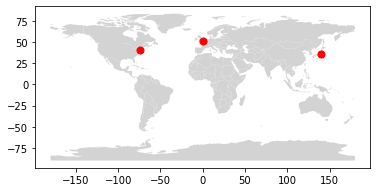

In [129]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Latitude and Longitude coordinates
latitudes = [40.7128, 51.5074, 35.6895]  # Example latitude values (New York, London, Tokyo)
longitudes = [-74.0060, -0.1278, 139.6917]  # Example longitude values (New York, London, Tokyo)

# Create a GeoDataFrame from the coordinates
points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(longitudes, latitudes))

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the world map
world.plot(ax=ax, color='lightgray')

# Plot the points on the map
points.plot(ax=ax, markersize=50, color='red')

# Show the map
plt.show()


In [130]:
df['latitude'].value_counts()

11.707240104675293    3323
12.090120315551758    2579
7.4019598960876465    2452
11.831100463867188    2376
12.595190048217773    2326
                      ... 
10.813901901245115     172
13.062664985656738     171
11.285202026367188     170
12.201859474182127     168
11.85260253             78
Name: latitude, Length: 72, dtype: int64

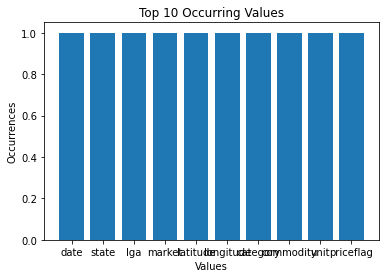

In [132]:
import matplotlib.pyplot as plt

# Example dataset
data = df

# Count the occurrences of each value
value_counts = {}
for value in data:
    value_counts[value] = value_counts.get(value, 0) + 1

# Sort the values in descending order based on their occurrences
sorted_values = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the first 10 highest occurring values and their counts
top_values = sorted_values[:10]
values, counts = zip(*top_values)

# Create a bar chart
plt.bar(values, counts)

# Set the x-axis label and y-axis label
plt.xlabel('Values')
plt.ylabel('Occurrences')

# Set the title of the bar chart
plt.title('Top 10 Occurring Values')

# Show the bar chart
plt.show()


In [ ]:
df['VendorID'].unique()
df['VendorID'].value_counts()b
sns.countplot(x="VendorID", data=df)
df['VendorID'].value_counts().plot(kind='pie',autopct='%1.1f%%')

IndexError: index 0 is out of bounds for axis 0 with size 0

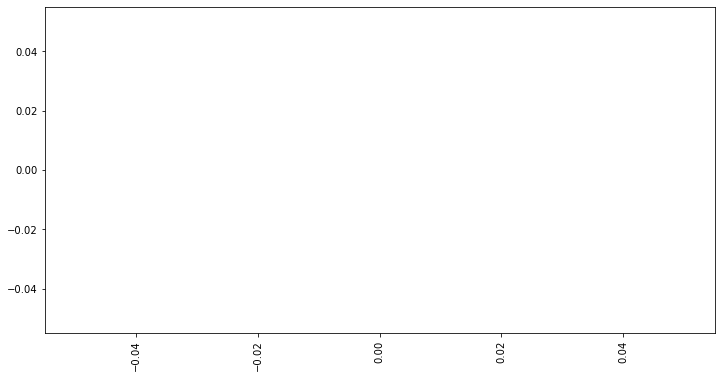

In [133]:
plt.figure(figsize=(12,6))
df[df["commodity"]=="category"]["year"].value_counts()[:20].plot(kind="bar",color="Red")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

In [169]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']

# Count occurrences of each category
category_counts = [data.count(category) for category in categories]

# Create the horizontal bar plot
plt.barh(categories, category_counts)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()


ValueError: No axis named Category A for object type DataFrame

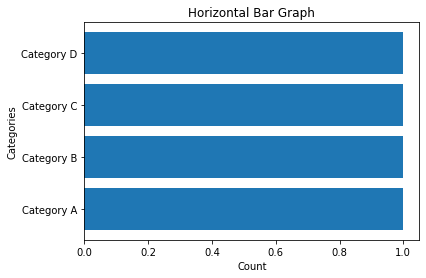

In [170]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = ['Category A', 'Category B', 'Category C', 'Category D']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()

# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()
